# Montu Python 
## Astronomical ephemerides for the Ancient World
## Test: Time routines (Cycle 2)


In [2]:
# Montu packages and data
from montu import *
Montu.load_kernels(verbose=False)
allstars=Stars()

# External packages
import plotly.express as px
from pyplanets.planets.mars import Mars

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
mtime = MonTime('-2501-01-01 12:00:00.0',calendar='proleptic')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2501-01-01 12:00:00.0
Date in mixed UTC: -2501-01-22 12:00:00
General:
    Components: [-1, 2501, 1, 1, 12, 0, 0, 0]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142037738672.6688
        jtd: 807589.6912885557
    UTC time:
        et: -142037798400.0
        jed: 807589.0000000002
    Delta-t = TT - UTC = 59727.3312
Strings:
    Date in SPICE format: 2502 B.C. 01-01 12:00:00.000000
    Date in proleptic calendar: -2501-01-01 12:00:00.0
    Date in proleptic calendar (jul.year): 2213-01-01 12:00:00.000000
    Date in mixed calendar: -2501-01-22 12:00:00
    Date in mixed calendar (jul.year): 2211-01-22 12:00:00
Objects:
    Date in datetime64 format: -2501-01-01T12:00:00.000
    Date in datetime format proleptic: 2501-01-01 12:00:00
    Date in datetime format proleptic (julian year): 2213-01-01 12:00:00
    Date in datetime format mixed: 2501-01-22 12:00:00
    Date in dat

In [5]:
mtime = MonTime('-2501-01-01 12:00:00.0',calendar='proleptic')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2501-01-01 12:00:00.0
Date in mixed UTC: -2501-01-22 12:00:00
General:
    Components: [-1, 2501, 1, 1, 12, 0, 0, 0]
    Is bce: True
Uniform scales:
    Terrestrial time:
        tt: -142037738672.6688
        jtd: 807589.6912885557
    UTC time:
        et: -142037798400.0
        jed: 807589.0000000002
    Delta-t = TT - UTC = 59727.3312
Strings:
    Date in SPICE format: 2502 B.C. 01-01 12:00:00.000000
    Date in proleptic calendar: -2501-01-01 12:00:00.0
    Date in proleptic calendar (jul.year): 2213-01-01 12:00:00.000000
    Date in mixed calendar: -2501-01-22 12:00:00
    Date in mixed calendar (jul.year): 2211-01-22 12:00:00
Objects:
    Date in datetime64 format: -2501-01-01T12:00:00.000
    Date in datetime format proleptic: 2501-01-01 12:00:00
    Date in datetime format proleptic (julian year): 2213-01-01 12:00:00
    Date in datetime format mixed: 2501-01-22 12:00:00
    Date in datetime format mixed (

In [12]:
mtime = MonTime('-2501-01-22 12:00:00.0',calendar='mixed')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2501-01-01 12:00:00.0
Date in mixed UTC: -2501-01-22 12:00:00
General:
    Components: [-1, 2501, 1, 1, 12, 0, 0, 0]
    Is bce: True
Uniform scales:
    Terrestrial time:
        tt: -142037738672.6688
        jtd: 807589.6912885557
    UTC time:
        et: -142037798400.0
        jed: 807589.0000000002
    Delta-t = TT - UTC = 59727.3312
Strings:
    Date in SPICE format: 2502 B.C. 01-01 12:00:00.000000
    Date in proleptic calendar: -2501-01-01 12:00:00.0
    Date in proleptic calendar (jul.year): 2213-01-01 12:00:00.000000
    Date in mixed calendar: -2501-01-22 12:00:00
    Date in mixed calendar (jul.year): 2211-01-22 12:00:00
Objects:
    Date in datetime64 format: -2501-01-01T12:00:00.000
    Date in datetime format proleptic: 2501-01-01 12:00:00
    Date in datetime format proleptic (julian year): 2213-01-01 12:00:00
    Date in datetime format mixed: 2501-01-22 12:00:00
    Date in datetime format mixed (

In [11]:
from montu import *
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('bce2501-01-01 12:00:00')
mars = PlanetaryBody('Mars')
mars.calculate_sky_position(mtime,tebas)

Computing position of body 'mars' at epoch: jtd = 807954.6909685184 
Updating orientation of site (old time 2000-01-01 11:58:56.126200, new time 2501 B.C. 01-01 12:00:00.000000)
Method 'SPICE':
	Position Epoch:  -2500-01-01 12:00:00.0 807953.9999999999
	Coordinates @ J2000: 
		Equatorial: 12:31:48.754 01:37:12.184
		Ecliptic: 186:39:46.949 04:38:36.308
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.796 24:06:28.555
		Ecliptic: 124:21:21.542 04:39:5.339
	Observing conditions: 
		Distance to site [au]:  0.660450348841685
		Distance to sun [au]:  1.6261149729985933
		Solar elongation [deg]:  157:49:18.876
		Phase angle [deg]:  13:21:31.981
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:15.527
		Local coordinates @ Epoch:  06:11:24.275 -41:38:31.094


In [23]:
c = Montu.dt2cal(np.datetime64('2500-01-01 12:00:00.00'),bce=1)
datestr = f'{-(c[1]-1)}-{c[2]:02d}-{c[3]:02d} {c[4]:02d}:{c[5]:02d}:{c[6]:02d}.{c[7]}'
datestr

'-2499-01-01 12:00:00.0'

In [35]:
spy.et2utc(-142037798400+7*31*DAY,'C',4)

'2502 B.C. AUG 06 11:59:18.8176'

In [26]:

spy.et2utc?

Signature:
spy.et2utc(
    et: Union[float, Iterable[float]],
    format_str: str,
    prec: int,
    lenout: int = 256,
) -> Union[numpy.ndarray, str]
Docstring:
Convert an input time from ephemeris seconds past J2000
to Calendar, Day-of-Year, or Julian Date format, UTC.

https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/et2utc_c.html

:param et: Input epoch, given in ephemeris seconds past J2000.
:param format_str: Format of output epoch.
:param prec: Digits of precision in fractional seconds or days.
:param lenout: The length of the output string plus 1.
:return: Output time string in UTC
File:      ~/opt/anaconda3/lib/python3.9/site-packages/spiceypy/spiceypy.py
Type:      function


In [57]:
MONTH_ABREVS = dict(JAN=1,FEB=2,MAR=3,APR=4,MAY=5,JUN=6,JUL=7,AUG=8,SEP=9,OCT=10,NOV=11,DEC=12)

sub_mn = lambda m:f'{MONTH_ABREVS[m.group(1)]:02d}-'
re.sub('B.C.\s*(\w+)\s*',sub_mn,'2501 B.C. JAN 01 12:00:00.00')

'2501 01-01 12:00:00.00'

In [72]:
mtime = MonTime('-2500-01-01 12:00:00.0',calendar='proleptic')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0000
Date in mixed UTC: -2500-01-22 12:00:00:
Date in SPICE format: 2501 B.C. 01-01 12:00:00.00
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 0]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.32
        jtd: 807954.6909685184
    UTC time:
        et: -142006262400.0
        jed: 807953.9999999999
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000000
    Date in PyPlanet Epoch: 807953.9999999999
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.6909685184
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323



In [89]:
from montu import *
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')
mars = PlanetaryBody('Mars')
mars.calculate_sky_position(mtime,tebas,method='all')

Computing position of body 'mars' at epoch: jtd = 807954.6909685184 
Updating orientation of site (old time 2000-01-01 11:58:56.1262, new time 2501 B.C. 01-01 12:00:00.00)
Method 'Horizons':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0000, JED = 807953.9999999999
	Coordinates @ J2000: 
		Equatorial: 12:31:49.147 01:37:6.708
		Ecliptic: 186:39:54.558 04:38:33.609
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.283 24:06:29.556
		Ecliptic: 124:21:14.472 04:39:4.619
	Observing conditions: 
		Distance to site [au]:  0.66052182424896
		Distance to sun [au]:  1.626124866723
		Solar elongation [deg]:  157:47:51.000
		Phase angle [deg]:  13:22:14.880
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:16.054
		Local coordinates @ Epoch:  06:11:33.727 -41:38:29.317
Method 'VSOP87':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0000, JED = 807953.9999999999
	Coordinates @ J2000: 
		Equatorial: 12:31:48.360 01:37:3

In [79]:
MONTH_ABREVS = dict(JAN=1,FEB=2,MAR=3,APR=4,MAY=5,JUN=6,JUL=7,AUG=8,SEP=9,OCT=10,NOV=11,DEC=12)
sub_nm = lambda m:f'-{MONTH_ABREVS[m.group(2)]:02d}-'
datestr = '2000 JAN 01 11:58:56.1262'
re.sub('\s+(\w+)\s+','xx',datestr)

'2000xx01 11:58:56.1262'

In [83]:
mtime = MonTime(0)
print(mtime)

2000 JAN 01 11:58:56.1262
Montu Time Object:
--------------------------
Date in proleptic UTC: 2000-01-01 11:58:56.1262
Date in mixed UTC: 2000-01-01 11:58:58:
Date in SPICE format: 2000-01-01 11:58:56.1262
General:
    Components: [1, 2000, 1, 1, 11, 58, 56, 126200]
    Is bce: False
    Is Julian: False
Uniform scales:
    Terrestrial time:
        tt: 0.0
        jtd: 2451545.0
    UTC time:
        et: -63.873832810959236
        jed: 2451544.9992607194
    Delta-t = TT - UTC = 63.873832810959236
Objects:
    Date in datetime64 format: 2000-01-01T11:58:56.126200
    Date in PyPlanet Epoch: 2451544.9992607194
    Date in PyEphem Epoch: 2000/1/1 11:58:56
    Date in AstroPy Time: 2451545.0
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:26:15.674
    True nutation longitude: 00:00:13.923
    Greenwhich Meridian Sidereal Time: 18:40:45.648



In [146]:
-47335314289.95533-(-47335400689.95533)

86400.0

In [260]:
#mtime = MonTime('500-01-01',calendar='mixed')
mtime = MonTime('1683-01-01',scale='utc',calendar='proleptic')
#mtime = MonTime('882-01-01',calendar='mixed')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: 1683-01-01 00:00:00.0000
Date in mixed UTC: 1683-01-01 00:00:00:
Date in SPICE format: 1683-01-01 00:00:00.0000
General:
    Components: [1, 1683, 1, 1, 0, 0, 0, 0]
    Is bce: False
    Is Julian: False
Uniform scales:
    Terrestrial time:
        tt: -10003521586.766115
        jtd: 2335763.50015317
    UTC time:
        et: -10003521600.00001
        jed: 2335763.5
    Delta-t = TT - UTC = 13.2338950992295
Objects:
    Date in datetime64 format: 1683-01-01T00:00:00.000000
    Date in PyPlanet Epoch: 2335763.5
    Date in PyEphem Epoch: 1683/1/1 00:00:00
    Date in AstroPy Time: 2335763.50015317
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:28:42.574
    True nutation longitude: 00:00:11.384
    Greenwhich Meridian Sidereal Time: 06:42:55.459



In [262]:
%timeit mtime = MonTime('500-01-01',calendar='mixed')
%timeit mtime = MonTime('500-01-01',calendar='proleptic')

1.17 ms ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.22 ms ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


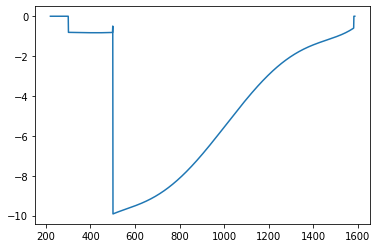

In [242]:
ys = []
dts = []
for y in np.arange(220,1588,1):
    if y == 0:continue
    ys += [y]
    mtime = MonTime(f'{y}-01-01',scale='utc',calendar='proleptic')
    dts += [(mtime.jed - round(mtime.jed,1))*DAY]
plt.plot(ys,dts)

In [240]:
import plotly.express as px
px.line(x=ys,y=dts)

In [245]:
np.savetxt(Montu._data_path('corrections_dt.dat'),np.vstack((ys,dts)).T)

In [175]:
(1903681.499994293-1903681.5)*DAY

-0.49307718873023987

In [118]:
spy.utc2et?

Signature: spy.utc2et(utcstr: str) -> float
Docstring:
Convert an input time from Calendar or Julian Date format, UTC,
to ephemeris seconds past J2000.

https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/utc2et_c.html

:param utcstr: Input time string, UTC.
:return: Output epoch, ephemeris seconds past J2000.
File:      ~/opt/anaconda3/lib/python3.9/site-packages/spiceypy/spiceypy.py
Type:      function


In [112]:
from montu import *
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('500-01-01 00:00:00',calendar='mixed')
mars = PlanetaryBody('Mars')
mars.calculate_sky_position(mtime,tebas,method='all')

Computing position of body 'mars' at epoch: jtd = 1903682.56608848 
Updating orientation of site (old time 2000-01-01 11:58:56.1262, new time 0500 A.D. 01-02 00:00:00.00)
Method 'Horizons':
	Position Epoch: prolectic gregorian 0500-01-02 00:00:00.0000, JED = 1903682.5
	Coordinates @ J2000: 
		Equatorial: 13:53:9.038 -9:21:18.972
		Ecliptic: 209:36:15.452 02:06:43.988
	Coordinates @ Epoch : 
		Equatorial: 12:35:29.573 -1:27:0.324
		Ecliptic: 188:42:54.835 02:12:51.080
	Observing conditions: 
		Distance to site [au]:  1.26559103756223
		Distance to sun [au]:  1.649850276737
		Solar elongation [deg]:  93:28:47.280
		Phase angle [deg]:  36:33:3.960
		Magnitude:  0.3
	Other properties: 
		Local true sidereal time:  08:57:16.697
		Hour angle @ Epoch:  20:21:47.133
		Local coordinates @ Epoch:  107:38:14.341 31:17:16.717
Method 'VSOP87':
	Position Epoch: prolectic gregorian 0500-01-02 00:00:00.0000, JED = 1903682.5
	Coordinates @ J2000: 
		Equatorial: -10:06:50.353 -9:21:25.010
		Ecliptic: 20